<a href="https://colab.research.google.com/github/gbagolin/ttr-project/blob/master/multi_class_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -O faces.zip "https://www.dropbox.com/s/t164dl4ulgcz5mq/faces.zip?dl=0"

In [ ]:
!unzip faces.zip

In [1]:
from sklearn.svm import SVC
from upload_dataset import upload_dataset
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from resnet import FeaturesExtractor

import numpy as np
import cv2


In [2]:
#Parameters initialization

NUM_CLASSES = 7

extractor = FeaturesExtractor()

#Dataset initialization
labels = []
features = []
class_list = range(7)

for i in class_list: 

  print("Iteration: ", i)
  tmp_dataset, tmp_labels = upload_dataset('faces/{0}/'.format(i), i)
  labels.append(tmp_labels)

  for img in tmp_dataset: 
    features.append(extractor.getFeatures(img))

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6


In [3]:
# Tensor conversion to numpy
X = [t.numpy() for t in features]
X = np.array(X) 
print("N Row = N Elements: {}, N Col = N Features: {}".format(X.shape[0], X.shape[1]))

N Row = N Elements: 6818, N Col = N Features: 2048


In [4]:
#Labels Declaration 
y = [] 
for label_list in labels:
  for element in label_list: 
    y.append(element)

In [5]:
from sklearn.model_selection import train_test_split
random_state = 0
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, stratify=y,
                     random_state=random_state)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("N Elements train: ", X_train.shape[0])
print("N Elements test: ", X_test.shape[0])

N Elements train:  6136
N Elements test:  682


In [17]:
from sklearn import svm
kernel = 'rbf'
max_iteration = 1000
classifier = svm.SVC(kernel=kernel, max_iter=max_iteration).fit(X_train, y_train)

In [ ]:
models = []
for i in range(NUM_CLASSES):
  models.append(SVC(kernel=kernel, max_iter=max_iteration, probability=True))

# 5. Models training
for i in range(NUM_CLASSES):
    models[i].fit(X_train, y_train==i)

In [ ]:
# 6. Classifico i dati del testing set e costruisco la matrice di confusione
predicted_scores = []
for i in range(NUM_CLASSES):
    predicted_scores.append(models[i].predict_proba(X_test)[:,1])

In [ ]:
predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

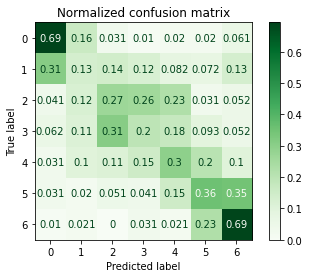

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_list,
                                 cmap=plt.cm.Greens,
                                 normalize='true')

disp.ax_.set_title("Normalized confusion matrix")

plt.show()